# Ciência de Dados Aplicada aos Dados Abertos da UFOP

por Rian Lucas Dias Guedes

<img src = "icea.png">

Imagem tirada por Helbert Igor Almeida

## Introdução

Desde que estabelecida em 2011, a Lei 12.527 garante aos cidadãos brasileiros o acesso às informações públicas dos órgãos e instituições governamentais em todas as esferas.  De acordo com a referida legislação, algumas informações  podem  ser  requeridas  por  meio  de  Sistemas de Informações aos Cidadãos enquanto  outras são disponibilizadas a  priori em  serviços  de transparência de  informações. 

Nesse  caso,  um  dos  mecanismos  da  Universidade  Federal  de  Ouro  Preto  para  prover transparência é o Portal UFOP Dados Abertos. Nele foram organizados conjuntos de dados agrupados como: Administração,  Institucional,  Planejamento,  Gestão  de  Pessoas,  Assistência Estudantil,  Graduação,  Extensão,  Pesquisa  e  Pós - Graduação.  Contudo,  indo de  encontro  com  a  própria  natureza  de  dados,  os  dados  disponibilizados nesse Portal estão em estado bruto,  ou seja,  em forma de tabelas as quais a correlação,  a  análise e  visualização  das  informações não é intuitiva.

Nesse sentido,  o objetivo desse projeto é utilizar Ciência de Dados para identificar insights  a  respeito  das  intersecções  entre  os  conjuntos  de  dados  abertos  de assistência  estudantil com  extensão,  pesquisa  e  pós-graduação  da  UFOP.  Logo, a metodologia empregará  como procedimento metodológico o estudo de caso combinado com as técnicas de Ciência de Dados.  Como resultados espera-se revelar a influência das ações de assistência estudantil para o desenvolvimento da extensão e da pesquisa na UFOP pelos discentes beneficiados.

## Sobre o Estudo

O objetivo dessa Iniciação Científica é utilizar a Ciência de Dados para identificar ideias a respeito das intersecções entre os conjuntos de dados disponibilizados no Portal de dados abertos da Universidade Federal de Ouro Preto (UFOP) para entender o comportamento e influência da assistência estudantil ao longo dos anos em relação aos beneficiados.

[Clique no link para acessar o portal](http://dados.ufop.br/)

O Portal de dados abertos apresenta 56 conjuntos de dados disponibilizados em oito categorias:
1. Administração
2. Assistência Estudantil
3. Extensão
4. Pesquisa e Pós-Graduação
5. Graduação
6. Institucional
7. Planejamento
8. Gestão de Pessoas

<div class="alert alert-block alert-info"
     <b> O estudo de caso abordará as categorias Assistência Estudantil, Extensão e Pesquisa e Pós-Graduação </b>
</div>

## Questões Norteadoras a serem respondidas

1. Em quais tipos de projetos (entre os de pesquisa e os de extensão) os discentes beneficiados com programas de assistência estudantil da UFOP têm maior participação?


2. Qual modalidade de participação nos projetos de extensão (bolsista ou voluntário) os discentes beneficiados com programas de assistência estudantil da UFOP têm maior participação?


3. Os discentes beneficiados com programas de assistência estudantil também ingressam nos programas de pós-graduação?

<div class="alert alert-block alert-info"
     <b> De dezoito conjuntos de dados a serem analisados, foram descartados oito conjuntos devido á falta de informações sobre os beneficiados de assistência estudantil na Universidade. </b>
</div>

<img src = "icea1.png">

Imagem tirada por Bruna Lima de Mello

## Teste Piloto

Foi utilizado o conjunto de dados "Bolsistas de Iniciação Científica" para fazer testes de limpeza e visualização de dados para averiguar o funcionamento do Jupyter e na montagem de estratégias que facilitem os próximos passos da Iniciação Científica.

### Importação de Bibliotecas

Algumas bibliotecas fazem parte da Ciência de Dados e é o primeiro passo para qualquer projeto. Logo:


In [3]:
#Importando bibliotecas para o Teste Piloto
import pandas as pd #biblioteca de dataframe 
%matplotlib inline 
import matplotlib.pyplot as plt #Para plotagem e confecção de gráficos
import random #Para criar a funcionalidade de sorteio aleatório
import numpy as np #Para cálculos matriciais 
import csv #para forçar a leitura de arquivos csv

### Arquivo CSV

No Portal de Dados Abertos da UFOP, foi realizado download do conjunto de dados "Bolsista_IC" e foi armazenada em um diretório específico no desktop utilizado. Diante desse cenário:

In [4]:
path = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsistas_ic.csv" #Endereço do csv para leitura

In [5]:
df = pd.read_csv(path, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8


<div class="alert alert-block alert-warning"
     <b> UTF - 8 é o formato padrão para o Brasil em relação ao manuseio de dados. </b>
</div>

### Operações Básicas 

In [6]:
df.dropna(inplace = True) # Descartando colunas com valor nulo para evitar erros


In [7]:
df.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 1 to 3790
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bolsista        3581 non-null   object
 1   curso_bolsista  3581 non-null   object
 2   programa        3581 non-null   object
 3   ano             3581 non-null   int64 
 4   orientador      3581 non-null   object
 5   setor           3581 non-null   object
 6   linha_pesquisa  3581 non-null   object
 7   id_projeto      3581 non-null   int64 
 8   título          3581 non-null   object
 9   fomento         3581 non-null   object
 10  tipo_bolsa      3581 non-null   object
dtypes: int64(2), object(9)
memory usage: 335.7+ KB


<div class="alert alert-block alert-success"
     <b> Com a função info(), é possível saber número de linhas, número de colunas, tamanho de bytes e os tipos de dados envolvidos. Certamente, é uma ótima função para análises mais profundas e fornece um start inicial em qualquer projeto em relação ao conhecimento de uma dataframe. </b>
</div>


In [8]:
df.shape #Tamanho da base de dados: número de linhas e número de colunas

(3581, 11)

In [9]:
df.columns #Saber o nome das colunas

Index(['bolsista', 'curso_bolsista', 'programa', 'ano', 'orientador', 'setor',
       'linha_pesquisa', 'id_projeto', 'título', 'fomento', 'tipo_bolsa'],
      dtype='object')

In [10]:
df.describe() #Estatistica Geral do dataframe


,ano,id_projeto
count,3581.000000,3581.000000
mean,2019.195197,5478.063111
std,1.372572,1703.265563
min,2017.000000,2326.000000
25%,2018.000000,3981.000000
50%,2019.000000,5617.000000
75%,2020.000000,6948.000000
max,2021.000000,8503.000000


<div class="alert alert-block alert-success"
     <b>Com a função describe(), obtemos insights estratégicos e estatísticos de maneira geral e inicial para contextualizar possíveis análises que podem ser realizadas com uma determinada dataframe.</b>
</div>
 

In [11]:
df.tail() #Imprime as 5 ultimas linhas do Dataframe

,bolsista,curso_bolsista,programa,ano,orientador,setor,linha_pesquisa,id_projeto,título,fomento,tipo_bolsa
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,PROGRAMA INSTITUCIONAL DE BOLSAS DE INICIAÇÃO ...,2021,MARCO ANTONIO MELO FRANCO (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR EM DIFERENTES ESP...,7722,COVID-19 E ESCOLARIZAÇÃO: O QUE MUDA NO PROCES...,CNPQ,BOLSISTA
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR AS DIVERSAS PRÁTI...,7063,Contribuições da Metodologia de Produções Narr...,UFOP,BOLSISTA
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR AS DIVERSAS PRÁTI...,7063,Contribuições da Metodologia de Produções Narr...,UFOP,BOLSISTA
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,ANELISE FONSECA DUTRA (DELET),DELET,ESTA LINHA INCORPORA A LINGUÍSTICA APLICADA EM...,7045,Teletandem: o desenvolvimento da competência i...,UFOP,BOLSISTA
3790,ALICE SILVEIRA DA SILVA,LETRAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,ANELISE FONSECA DUTRA (DELET),DELET,ESTA LINHA INCORPORA A LINGUÍSTICA APLICADA EM...,7045,Teletandem: o desenvolvimento da competência i...,UFOP,BOLSISTA


In [12]:
df['ano'].min() #menor data do dataframe

2017

In [13]:
df['ano'].max() #maior data do dataframe


2021

### Limpeza de Dados

O processo de limpeza de dados é crucial em projetos de Ciência e Análise de Dados, sendo um processo notório e importante para qualquer contexto. Logo, podemos analisar algumas medidas, entre elas:

In [14]:
df['tipo_bolsa'].replace("VOLUNTARIO", "VOLUNTÁRIO", inplace=True) # alterando valores da coluna tipo_bolsa

In [15]:
df.drop(['programa', 'linha_pesquisa', 'id_projeto', 'título'], axis=1, inplace=True) #removendo colunas que não serão usadas

In [16]:
df.columns = ['Bolsista','Curso','Ano','Orientador','Departamento','Fomento','Tipo de Aluno'] #Renomeando colunas

In [17]:
df['Tipo de Aluno'].value_counts(normalize=True) * 100 #porcentagem de alunos por tipo de bolsa

BOLSISTA      61.547054
VOLUNTÁRIO    38.452946
Name: Tipo de Aluno, dtype: float64

In [18]:
#Inserindo coluna para contagem para facilitar nas análises
df['Contagem'] = 1

In [19]:
df.drop(['Orientador'], axis=1, inplace=True) #Excluindo o campo Orientador

In [20]:
def categorizar_departamento(Departamento): #Função para categorizar os departamentos em Unidades
    if Departamento == "DEEGEP"or Departamento =="DEETE":
        return 'CEAD'
    elif Departamento == "DEENP" or Departamento =="DEELT" or Departamento =="DECSI" or Departamento =="DECEA":
        return 'ICEA'
    elif Departamento == "DECAD" or Departamento =="DECSO" or Departamento =="DEECO" or Departamento =="DEJOR" or Departamento =="DESSO":
        return 'ICSA'
    elif Departamento == "DEART" or Departamento =="DEFIL" or Departamento =="DEHIS" or Departamento =="DELET":
        return 'ICHS'
    elif Departamento == "DEDIR" or Departamento =="DEMUL" or Departamento =="DETUR":
        return 'EDTM'
    elif Departamento == "DEEFD":
        return 'EEF'
    elif Departamento == "DEACL" or Departamento =="DEFAR":
        return 'EFAR'
    elif Departamento == "DEAMB" or Departamento =="DEARQ" or Departamento =="DECAT" or Departamento =="DEMEC" or Departamento =="DECIV" or Departamento =="DEGEO" or Departamento =="DEMET" or Departamento =="DEMIN" or Departamento =="DEPRO" or Departamento =="DEURB":
        return 'EMINAS'
    elif Departamento == "DECPG" or Departamento =="DECPA" or Departamento =="DEMSC":
        return 'EMED'
    elif Departamento == "DEALI" or Departamento =="DENCS":
        return 'ENUT'
    elif Departamento == "DECOM" or Departamento =="DEFIS" or Departamento =="DEQUI" or Departamento =="DECBI" or Departamento =="DEBIO" or Departamento =="DEEMA" or Departamento =="DEEST" or Departamento =="DEMAT":
        return 'ICEB'
    else:
        return 'IFAC'

In [21]:
df['Unidade'] = df['Departamento'].apply(categorizar_departamento) #aplicação da função acima

In [22]:
df #Imprimindo a database com base nas alterações acima

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Contagem,Unidade
1,ALINE TONHELA FERRAZ,FARMACIA,2017,DECBI,FAPEMIG,BOLSISTA,1,IFAC
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC
4,ANA CAROLINA DA SILVA,TURISMO,2017,DETUR,UFOP,VOLUNTÁRIO,1,IFAC
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,DECOM,UFOP,VOLUNTÁRIO,1,IFAC
...,...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,DEEDU,CNPQ,BOLSISTA,1,IFAC
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,DEEDU,UFOP,BOLSISTA,1,IFAC
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,2021,DEEDU,UFOP,BOLSISTA,1,IFAC
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS


### Visualização de Dados

A visualização de dados é outro processo crucial em Ciência de Dados e Análise de Dados em qualquer contexto, o objetivo desse processo é detalhar, mostrar, apresentar e organizar as informações que podem ser contidas ao analisar dados expostos de maneira fácil e interativa ao usuário.

In [23]:
#Cores para serem usadas nos gráficos
colors = [['#AFB0D4','#8589FB','#CFD1FA','#41437A','#A5A6C7'],
          ['#E2C5FD','#BC78FB','#DFC3FA','#5C3B7A','#B29BC7'],
          ['#AAFAC6','#5FFB96','#AAFAC6','#2F7A49','#87C79E']
         ]

### Questões Norteadoras

1. Quantos alunos são bolsistas e quantos alunos são voluntários nos projetos de Iniciação Científica?

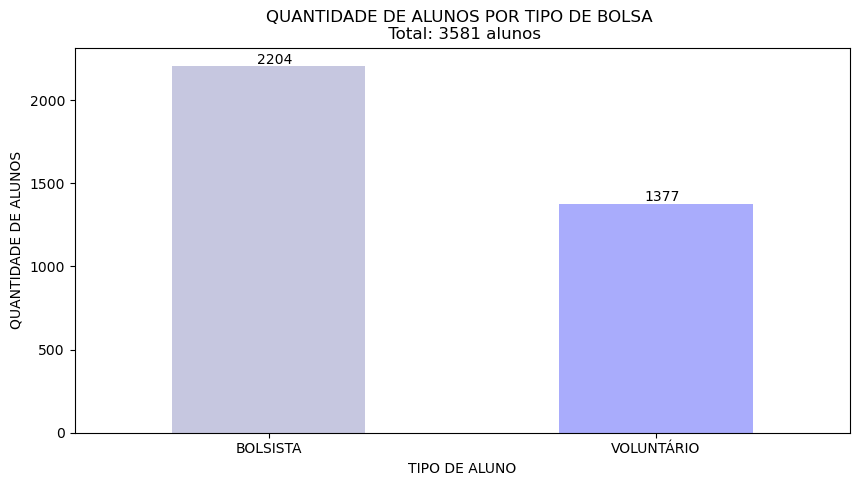

In [24]:
grafico_df = df.groupby('Tipo de Aluno')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico_df.patches:
    b=p.get_bbox()
    grafico_df.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('TIPO DE ALUNO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR TIPO DE BOLSA \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.show()

2. Quantos alunos de Iniciação Científica pertecem a uma determinada agência de fomento?

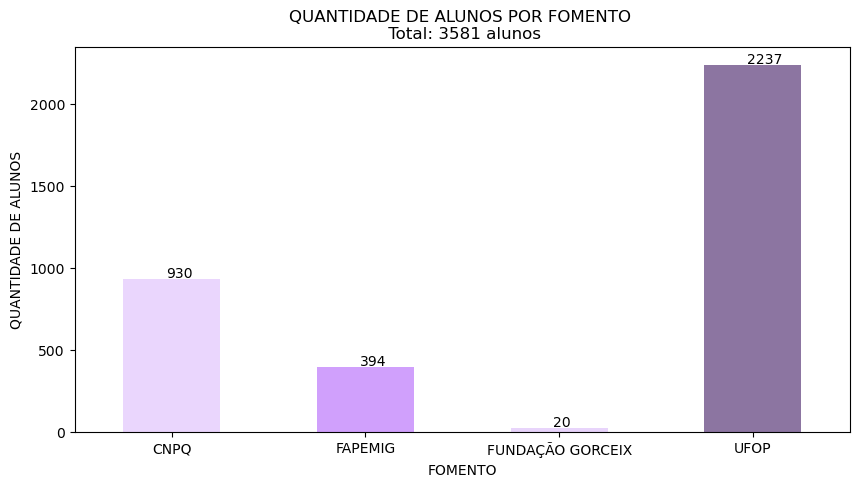

In [25]:
grafico_df_um = df.groupby('Fomento')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico_df_um.patches:
    b=p.get_bbox()
    grafico_df_um.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('FOMENTO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR FOMENTO \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.show()

3. Quantos alunos de Iniciação Científica pertecem a um determinado departamento?

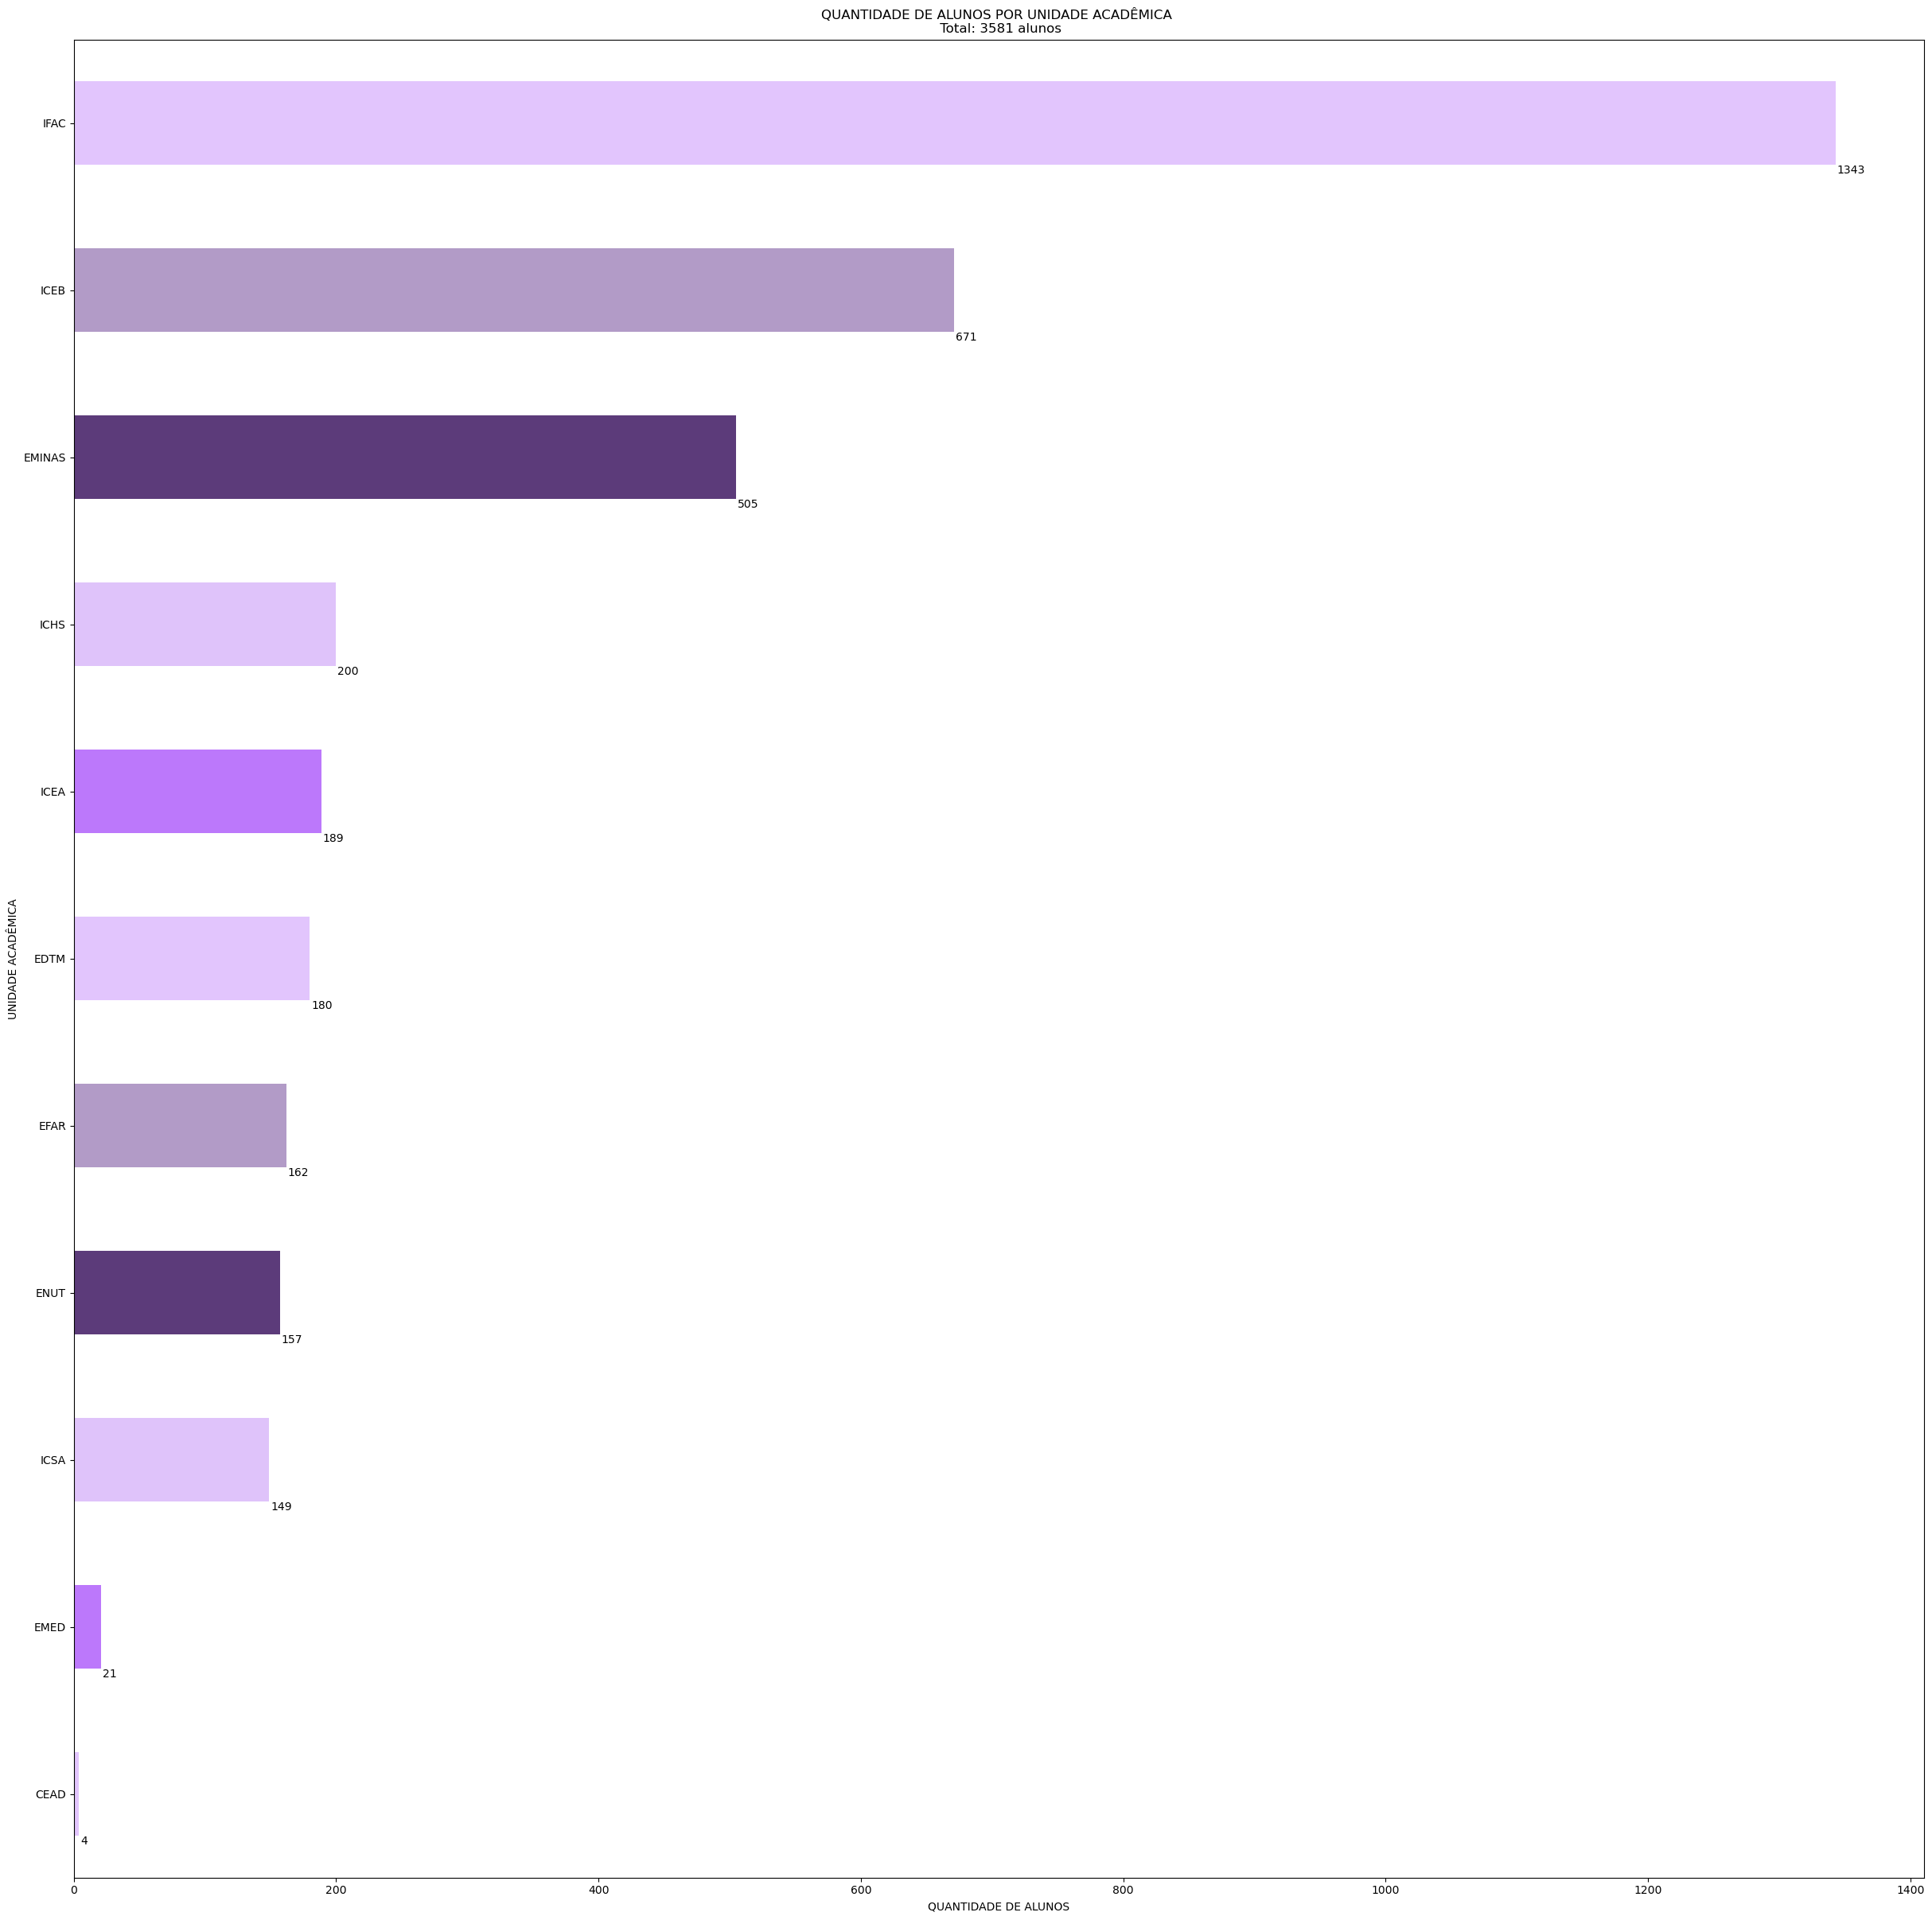

In [26]:
barras_df = df.groupby('Unidade')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in barras_df.patches:
    b=p.get_bbox()
    barras_df.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR UNIDADE ACADÊMICA \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.ylabel('UNIDADE ACADÊMICA')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

4. Quantos alunos de um determinado curso da UFOP fazem Iniciação Científica?

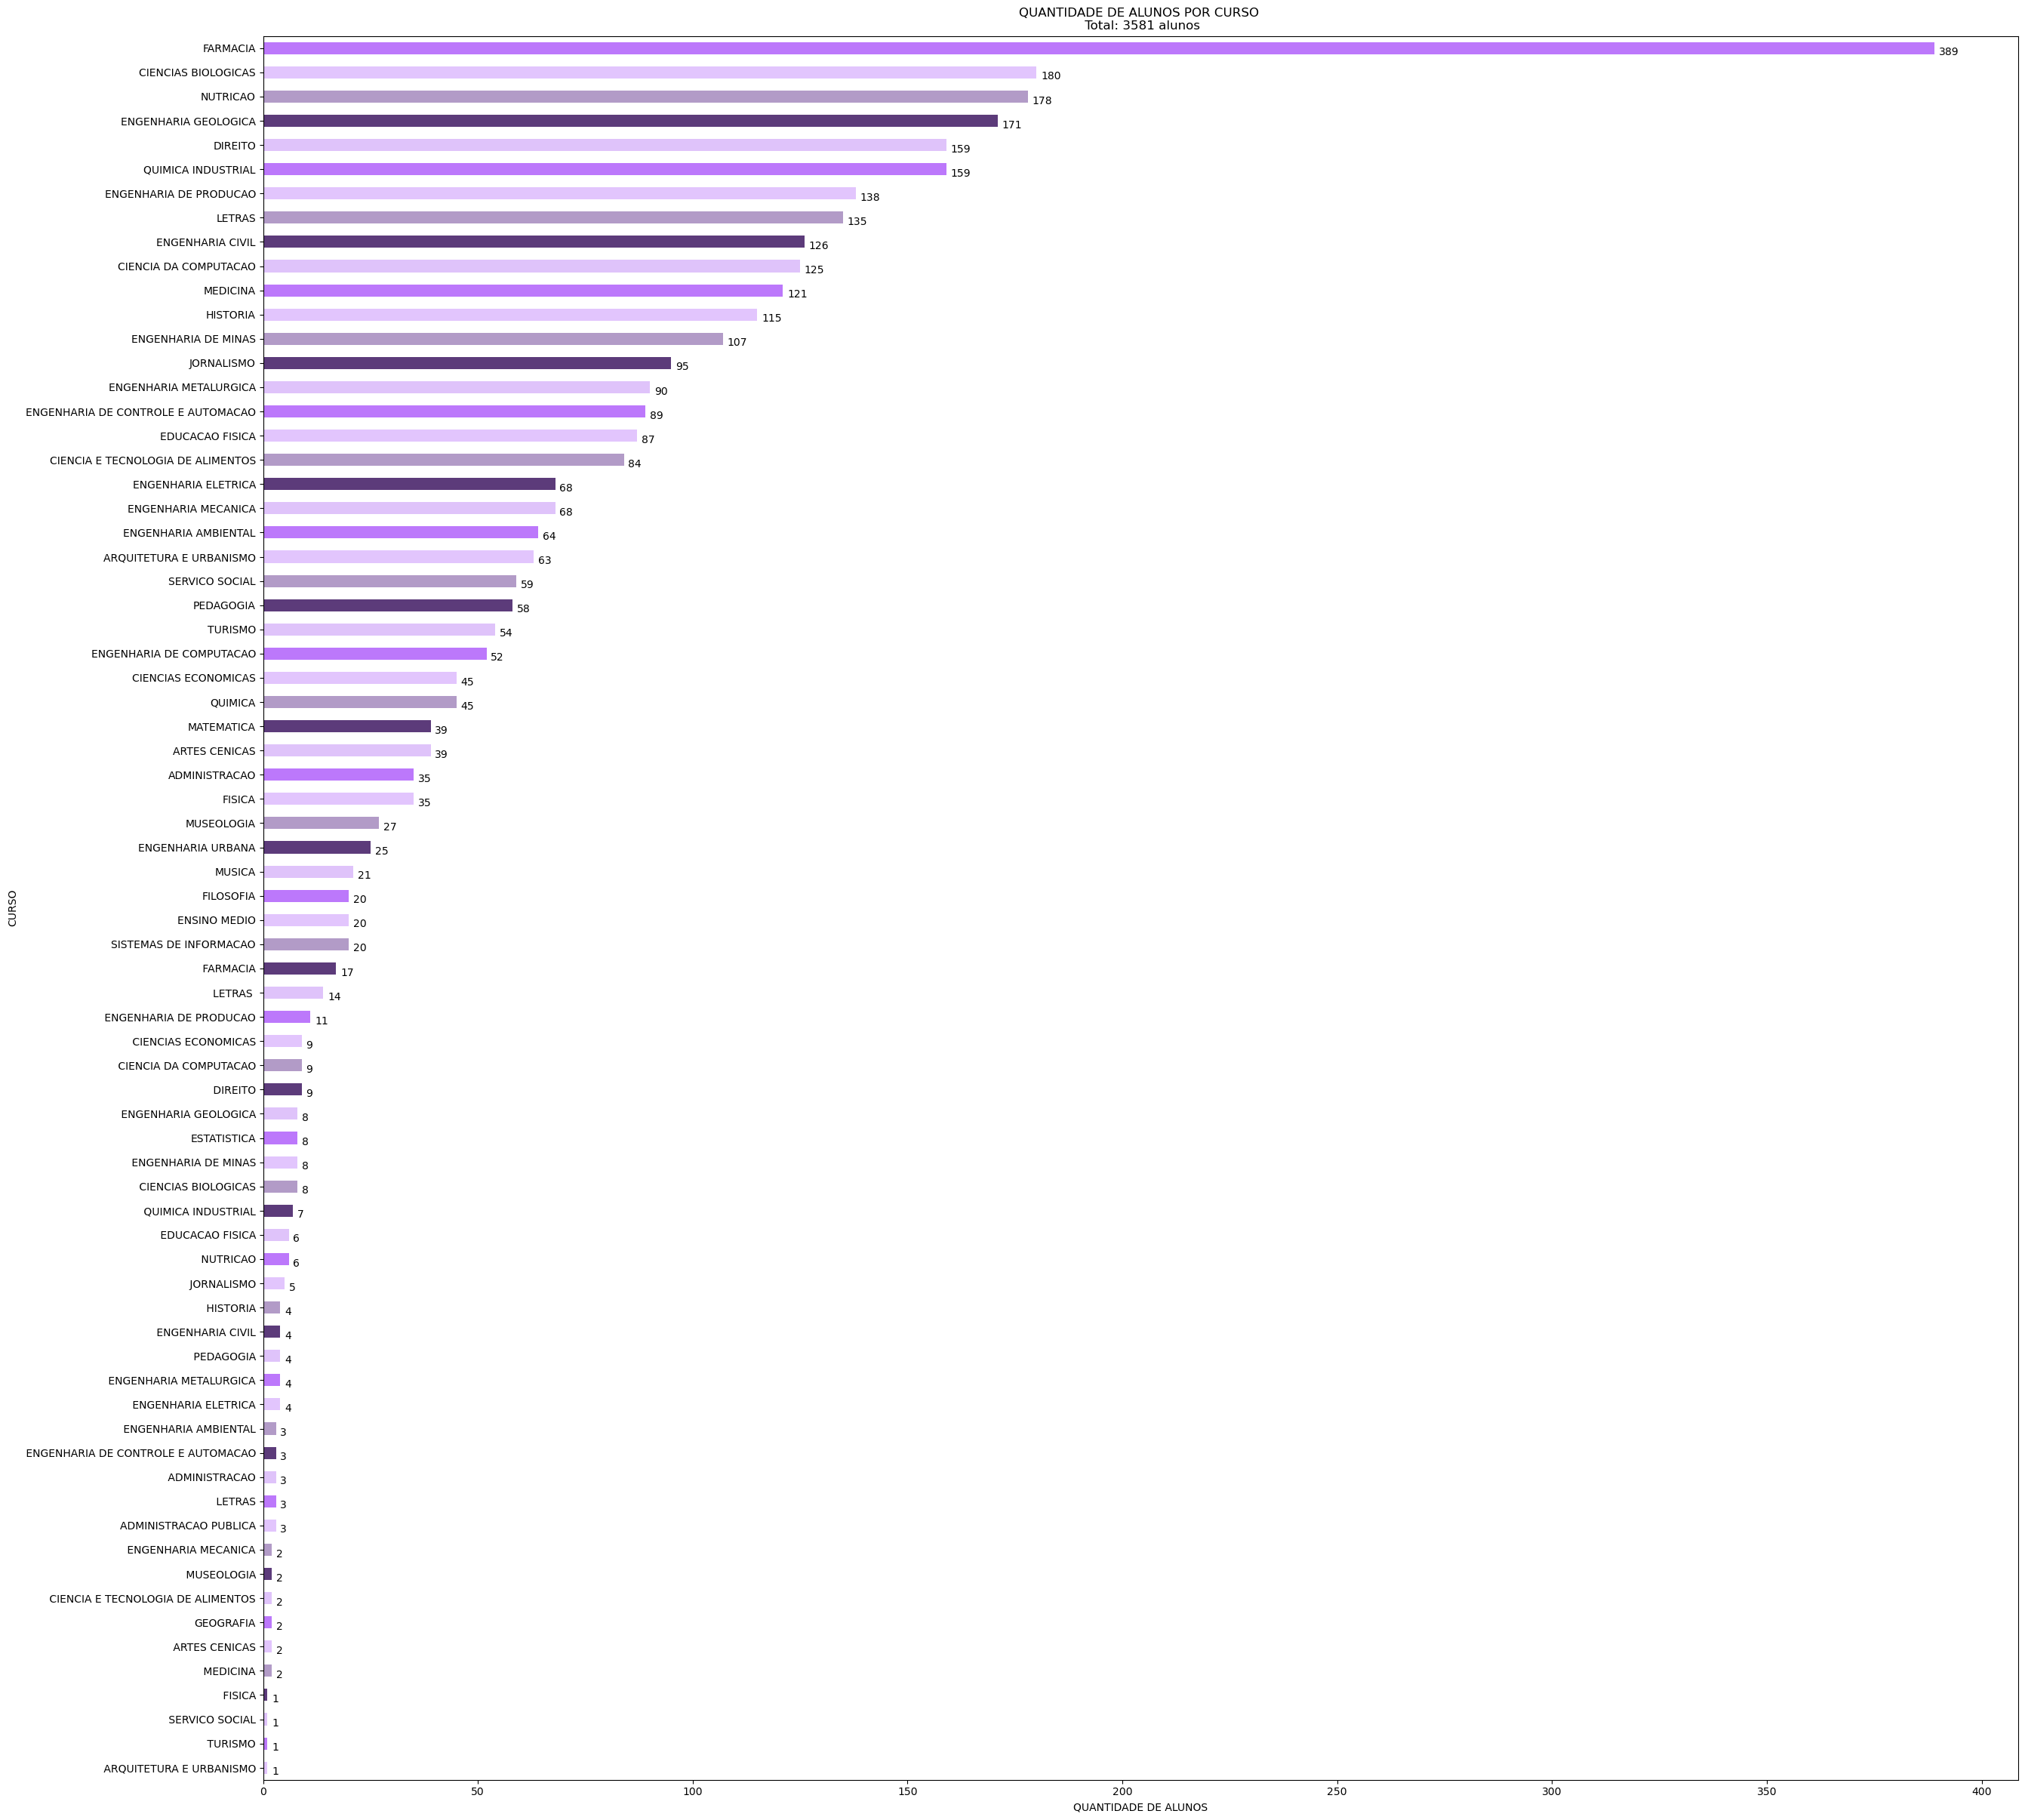

In [27]:
barras_df_um = df.groupby('Curso')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in barras_df_um.patches:
    b=p.get_bbox()
    barras_df_um.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR CURSO \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.ylabel('CURSO')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

<div class="alert alert-block alert-info"
     <b> Observação: o conjunto de dados apresenta a quantidade de cursos que o aluno se matriculou e registra se ele trancou algum período e retornou depois. Logo, foi realizado um filtro para eliminar esses casos especiais. </b>
</div>


Quantos alunos por ano fazem Iniciação Científica na UFOP?

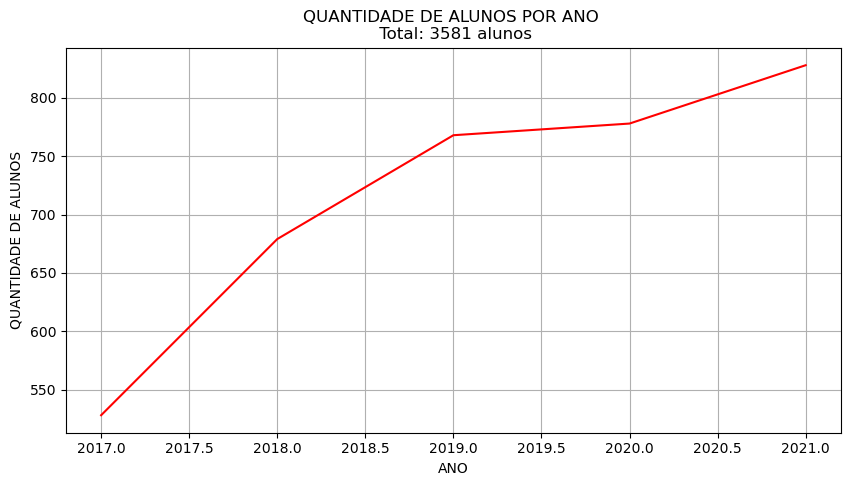

In [28]:
plotagem = df.copy()
plotagem.groupby('Ano')['Contagem'].sum().plot(color='red', figsize=(10,5), grid=True)

plt.title('QUANTIDADE DE ALUNOS POR ANO \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.show()

<div class="alert alert-block alert-info"
     <b> Observação: os anos estão dividos em semestres, utilizando os números decimais 0 e 5 para diferenciar o semestre de cada ano. </b>
</div>

## Segundo Teste Piloto


Além do conjunto de dados "Bolsistas de Iniciação Científica", foi utilizada para tratamento de dados, limpeza e visualização a base de dados "Bolsa Renumerada".

No Portal de Dados Abertos da UFOP, existem várias planilhas e arquivos PDF organizados por ano. Diante dessa situação, foram unificados todas as planilhas e convertemos PDF para CSV para utilizarmos uma única planilha.

O campo "Razão Social" foi desconsiderado da planilha devido ao fato de ter nenhum registro nos conjuntos de dados escolhidos. As bases são de 2010 á 2022.

### Importando o Conjunto de Dados

In [29]:
path_um = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsa_renumerada.csv" #Endereço do csv para leitura

In [30]:
df_um = pd.read_csv(path_um, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [31]:
df_um

,nome,Código curso,descricao/bolsa,data_inicio,data_fim
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,AUXILIO MORADIA - JM,2013,2015.0
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,AUXILIO MORADIA - JM,2013,2013.0
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,AUXILIO MORADIA - JM,2013,2016.0
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0
...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,BOLSA PERMANENCIA,2016,2019.0
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,BOLSA PERMANENCIA,2016,2019.0
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,BOLSA PERMANENCIA,2016,2019.0
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,BOLSA PERMANENCIA,2016,2019.0


### Operações Básicas

In [32]:
df_um.dropna(inplace = True) # Descartando colunas com valor nulo para evitar erros

In [33]:
df_um.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34719 entries, 0 to 35172
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             34719 non-null  object 
 1   Código curso     34719 non-null  object 
 2   descricao/bolsa  34719 non-null  object 
 3   data_inicio      34719 non-null  int64  
 4   data_fim         34719 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


In [34]:
df_um.shape #Tamanho da base de dados: número de linhas e número de colunas

(34719, 5)

In [35]:
df_um.columns #Saber o nome das colunas

Index(['nome', 'Código curso', 'descricao/bolsa', 'data_inicio', 'data_fim'], dtype='object')

In [36]:
df_um.describe() #Estatistica Geral do dataframe

,data_inicio,data_fim
count,34719.000000,34719.000000
mean,2016.775512,2019.119013
std,10.047228,3.078978
min,212.000000,2009.000000
25%,2015.000000,2017.000000
50%,2017.000000,2020.000000
75%,2019.000000,2021.000000
max,2022.000000,2025.000000


In [37]:
df_um.tail() #Imprime as 5 ultimas linhas do Dataframe

,nome,Código curso,descricao/bolsa,data_inicio,data_fim
35168,CAROLINA PAMELA DA COSTA,MEDICINA,BOLSA PERMANENCIA,2016,2019.0
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,BOLSA PERMANENCIA,2016,2019.0
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,BOLSA PERMANENCIA,2016,2019.0
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,BOLSA PERMANENCIA,2016,2019.0
35172,DASAYEVE KAIQUE SOUZA DE OLIVEIRA XAVIER,ENGENHARIA DE COMPUTACAO,AUXILIO MORADIA - JM,2016,2020.0


In [38]:
df_um['data_inicio'].min() #menor data de inicio do dataframe

212

In [39]:
df_um['data_inicio'].max() #maior data de inicio do dataframe

2022

In [40]:
df_um['data_fim'].min() #menor data fim do dataframe

2009.0

In [41]:
df_um['data_fim'].max() #maior data fim do dataframe

2025.0

### Limpeza de Dados

In [42]:
#Inserindo coluna para contagem para facilitar nas análises
df_um['Contagem'] = 1

In [43]:
df_um.columns = ['Bolsista','Curso','Categoria da Bolsa','Data de Inicio','Data Fim','Contagem'] #Renomeando colunas

In [44]:
df_um

,Bolsista,Curso,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,AUXILIO MORADIA - JM,2013,2013.0,1
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,AUXILIO MORADIA - JM,2013,2016.0,1
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
...,...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,BOLSA PERMANENCIA,2016,2019.0,1
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,BOLSA PERMANENCIA,2016,2019.0,1
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,BOLSA PERMANENCIA,2016,2019.0,1
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,BOLSA PERMANENCIA,2016,2019.0,1


### Alterando Valores das Categorias de Bolsa

In [45]:
df_um['Categoria da Bolsa'].replace("AUXILIO MORADIA - JM", "MORADIA", inplace=True) # alterando valores da coluna

In [46]:
df_um['Categoria da Bolsa'].replace("AUXILIO MORADIA MEDIDA PROTETIVA", "MORADIA", inplace=True) # alterando valores da coluna

In [47]:
df_um['Categoria da Bolsa'].replace("BIDA-INCENTIVO DESENV. ACADEMICO", "BIDA", inplace=True) #alterando valores da coluna

In [48]:
df_um['Categoria da Bolsa'].replace("BOLSA AUXILIO MORADIA - REFORMA MA", "MORADIA", inplace=True) #alterando valores da coluna

In [49]:
df_um['Categoria da Bolsa'].replace("BOLSA COMPLEMENTO RU", "RU", inplace=True) #alterando valores da coluna

In [50]:
df_um['Categoria da Bolsa'].replace("BOLSA INTEGRAL RU", "RU", inplace=True) #alterando valores da coluna

In [51]:
df_um['Categoria da Bolsa'].replace("BOLSA PARCIAL RU", "RU", inplace=True) #alterando valores da coluna

In [52]:
df_um['Categoria da Bolsa'].replace("BOLSA PARCIAL RU COM TICKET", "RU", inplace=True) #alterando valores da coluna

In [53]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [54]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA MEC", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [55]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA QUILOMBOLA", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [56]:
df_um['Categoria da Bolsa'].replace("BOLSA PIDIC PRACE", "PIDIC", inplace=True) #alterando valores da coluna

In [57]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/NEI", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [58]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [59]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE - 15HS", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [60]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE - 20HS", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [61]:
df_um['Categoria da Bolsa'].replace("EXTENSÃƒO PRACE 2018", "EXTENSÃO", inplace=True) #alterando valores da coluna

In [62]:
df_um['Categoria da Bolsa'].replace("EXTENSÃO PRACE 2018", "EXTENSÃO", inplace=True) #alterando valores da coluna

In [63]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL AQUISI??O", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [64]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL AQUISI??O PCD", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [65]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL MANUTEN??O", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [66]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL MANUTEN??O PCD", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [67]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL PRACE BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [68]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL PRACE N?O BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [69]:
df_um['Categoria da Bolsa'].replace("INCLUSÃO DIGITAL PRACE BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [70]:
df_um['Categoria da Bolsa'].replace("INCLUSÃO DIGITAL PRACE NÃO BOLSISTA AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [71]:
df_um['Categoria da Bolsa'].replace("MONITORIA INCLUSIVA - NEI", "NEI", inplace=True) #alterando valores da coluna

In [72]:
df_um['Categoria da Bolsa'].replace("PRODESA - DESENV. SOCIAL E ACADEMICO", "PRODESA", inplace=True) #alterando valores da coluna

### Alterando Valores dos Cursos

In [73]:
df_um['Curso'].replace("SJM", "SISTEMAS DE INFORMACAO", inplace=True) #alterando valores da coluna

In [74]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [75]:
df_um['Curso'].replace("MED", "MEDICINA", inplace=True) #alterando valores da coluna

In [76]:
df_um['Curso'].replace("NUT", "NUTRICAO", inplace=True) #alterando valores da coluna

In [77]:
df_um['Curso'].replace("PED", "PEDAGOGIA", inplace=True) #alterando valores da coluna

In [78]:
df_um['Curso'].replace("TUR", "TURISMO", inplace=True) #alterando valores da coluna

In [79]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [80]:
df_um['Curso'].replace("ARQ", "ARQUITETURA", inplace=True) #alterando valores da coluna

In [81]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [82]:
df_um['Curso'].replace("ACB", "ARTES CENICAS", inplace=True) #alterando valores da coluna

In [83]:
df_um['Curso'].replace("ACL", "ARTES CENICAS", inplace=True) #alterando valores da coluna

In [84]:
df_um['Curso'].replace("COM", "CIENCIA DA COMPUTACAO", inplace=True) #alterando valores da coluna

In [85]:
df_um['Curso'].replace("ALI", "CIENCIA E TECNOLOGIA DE ALIMENTOS", inplace=True) #alterando valores da coluna

In [86]:
df_um['Curso'].replace("CBB", "CIENCIAS BIOLOGICAS", inplace=True) #alterando valores da coluna

In [87]:
df_um['Curso'].replace("CBL", "CIENCIAS BIOLOGICAS", inplace=True) #alterando valores da coluna

In [88]:
df_um['Curso'].replace("DIR", "DIREITO", inplace=True) #alterando valores da coluna

In [89]:
df_um['Curso'].replace("D04", "DIREITO", inplace=True) #alterando valores da coluna

In [90]:
df_um['Curso'].replace("QLI", "QUIMICA", inplace=True) #alterando valores da coluna

In [91]:
df_um['Curso'].replace("QUI", "QUIMICA INDUSTRIAL", inplace=True) #alterando valores da coluna

In [92]:
df_um['Curso'].replace("SER", "SERVICO SOCIAL", inplace=True) #alterando valores da coluna

In [93]:
df_um['Curso'].replace("ECO", "CIENCIAS ECONOMICAS", inplace=True) #alterando valores da coluna

In [94]:
df_um['Curso'].replace("EJM", "ENGENHARIA ELETRICA", inplace=True) #alterando valores da coluna

In [95]:
df_um['Curso'].replace("PJM", "ENGENHARIA DE PRODUCAO", inplace=True) #alterando valores da coluna

In [96]:
df_um['Curso'].replace("CJM", "ENGENHARIA DA COMPUTACAO", inplace=True) #alterando valores da coluna

In [97]:
df_um['Curso'].replace("GEO", "ENGENHARIA GEOLOGICA", inplace=True) #alterando valores da coluna

In [98]:
df_um['Curso'].replace("EST", "ESTATISTICA", inplace=True) #alterando valores da coluna

In [99]:
df_um['Curso'].replace("FAR", "FARMACIA", inplace=True) #alterando valores da coluna

In [100]:
df_um['Curso'].replace("PRO", "ENGENHARIA DE PRODUCAO", inplace=True) #alterando valores da coluna

In [101]:
df_um['Curso'].replace("JOR", "JORNALISMO", inplace=True) #alterando valores da coluna

In [102]:
df_um['Curso'].replace("URB", "ENGENHARIA URBANA", inplace=True) #alterando valores da coluna

In [103]:
df_um['Curso'].replace("HIB", "HISTORIA", inplace=True) #alterando valores da coluna

In [104]:
df_um['Curso'].replace("HIL", "HISTORIA", inplace=True) #alterando valores da coluna

In [105]:
df_um['Curso'].replace("MEC", "ENGENHARIA MECANICA", inplace=True) #alterando valores da coluna

In [106]:
df_um['Curso'].replace("MET", "ENGENHARIA METALURGICA", inplace=True) #alterando valores da coluna

In [107]:
df_um['Curso'].replace("MIN", "ENGENHARIA DE MINAS", inplace=True) #alterando valores da coluna

In [108]:
df_um['Curso'].replace("AMB", "ENGENHARIA AMBIENTAL", inplace=True) #alterando valores da coluna

In [109]:
df_um['Curso'].replace("AUT", "ENGENHARIA DE CONTROLE E AUTOMOCAO", inplace=True) #alterando valores da coluna

In [110]:
df_um['Curso'].replace("CIV", "ENGENHARIA CIVIL", inplace=True) #alterando valores da coluna

In [111]:
df_um['Curso'].replace("EFB", "EDUCACAO FISICA", inplace=True) #alterando valores da coluna

In [112]:
df_um['Curso'].replace("EFL", "EDUCACAO FISICA", inplace=True) #alterando valores da coluna

In [113]:
df_um['Curso'].replace("FLB", "FILOSOFIA", inplace=True) #alterando valores da coluna

In [114]:
df_um['Curso'].replace("FLL", "FILOSOFIA", inplace=True) #alterando valores da coluna

In [115]:
df_um['Curso'].replace("FSB", "FISICA", inplace=True) #alterando valores da coluna

In [116]:
df_um['Curso'].replace("FSL", "FISICA", inplace=True) #alterando valores da coluna

In [117]:
df_um['Curso'].replace("LTB", "LETRAS", inplace=True) #alterando valores da coluna

In [118]:
df_um['Curso'].replace("LTL", "LETRAS", inplace=True) #alterando valores da coluna

In [119]:
df_um['Curso'].replace("LTE", "LETRAS", inplace=True) #alterando valores da coluna

In [120]:
df_um['Curso'].replace("LTP", "LETRAS", inplace=True) #alterando valores da coluna

In [121]:
df_um['Curso'].replace("LTT", "LETRAS", inplace=True) #alterando valores da coluna

In [122]:
df_um['Curso'].replace("LTI", "LETRAS", inplace=True) #alterando valores da coluna

In [123]:
df_um['Curso'].replace("MTL", "MATEMATICA", inplace=True) #alterando valores da coluna

In [124]:
df_um['Curso'].replace("MTB", "MATEMATICA", inplace=True) #alterando valores da coluna

In [125]:
df_um['Curso'].replace("MUL", "MUSEOLOGIA", inplace=True) #alterando valores da coluna

In [126]:
df_um['Curso'].replace("MUS", "MUSICA", inplace=True) #alterando valores da coluna

### Alterando Valores dos Anos

In [127]:
df_um['Data de Inicio'].replace("212", "2012", inplace=True) #alterando valores da coluna

In [128]:
df_um

,Bolsista,Curso,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,MORADIA,2013,2015.0,1
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,MORADIA,2013,2013.0,1
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,MORADIA,2013,2016.0,1
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
...,...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,PERMANENCIA,2016,2019.0,1
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,PERMANENCIA,2016,2019.0,1
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,PERMANENCIA,2016,2019.0,1
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,PERMANENCIA,2016,2019.0,1


### Visualização de Dados

### Questões Norteadoras

1. Qual a quantidade de alunos por categoria de bolsa?

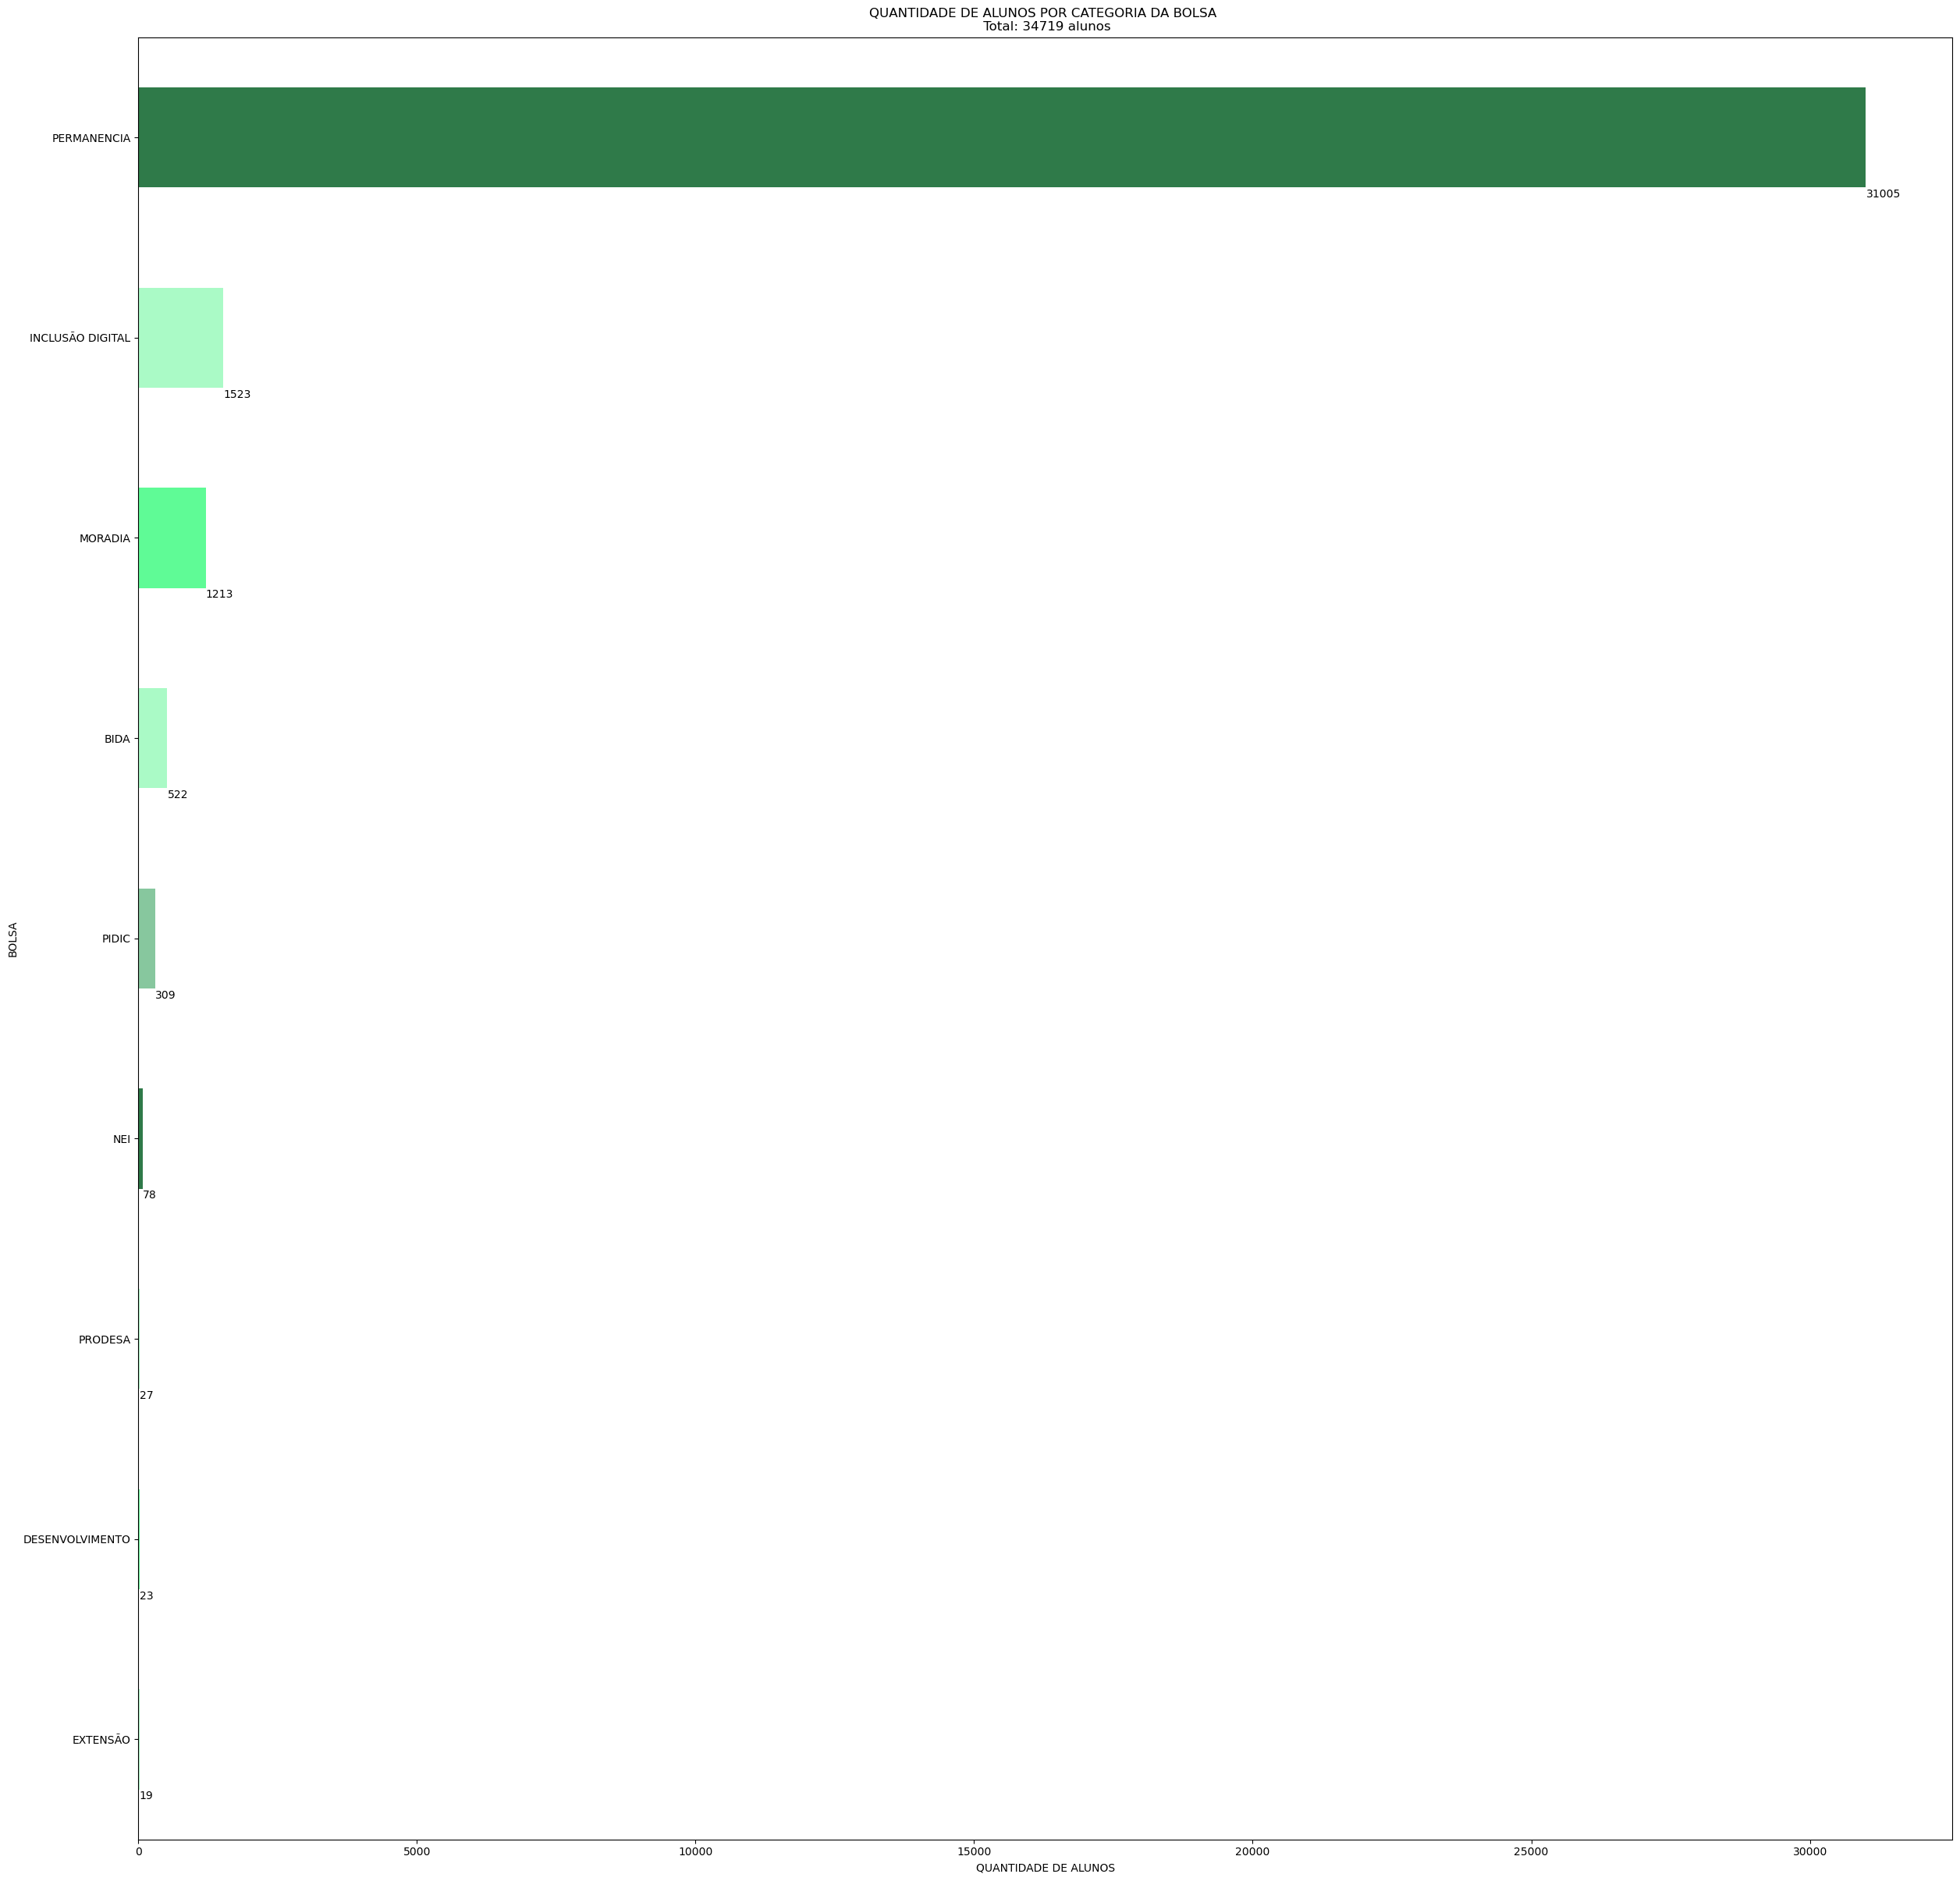

In [129]:
histograma_um = df_um.groupby('Categoria da Bolsa')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma_um.patches:
    b=p.get_bbox()
    histograma_um.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR CATEGORIA DA BOLSA \n Total: ' + str(df_um['Contagem'].sum()) + ' alunos')
plt.ylabel('BOLSA')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

2. Qual a progressão anual em relação a data de encerramento de bolsas renumeradas?

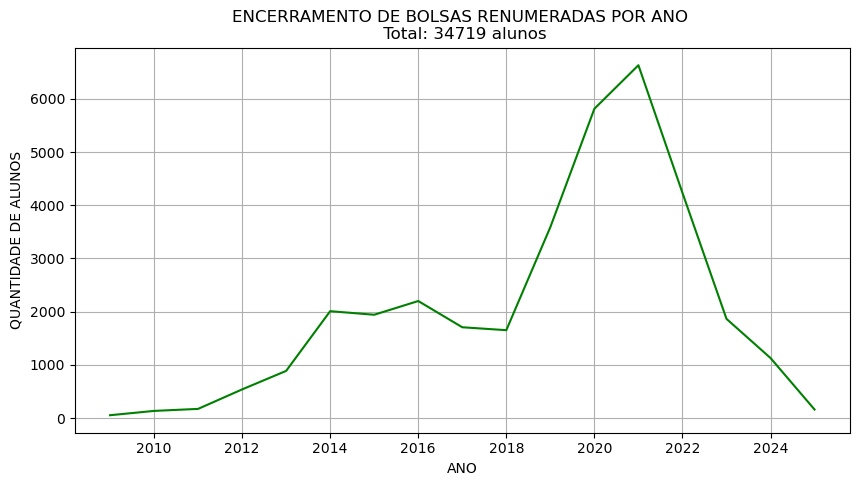

In [130]:
plotagem_um_um = df_um.copy()
plotagem_um_um.groupby('Data Fim')['Contagem'].sum().plot(color='green', figsize=(10,5), grid=True)

plt.title('ENCERRAMENTO DE BOLSAS RENUMERADAS POR ANO \n Total: ' + str(df_um['Contagem'].sum()) + ' alunos')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.show()

## Cruzando os dois conjuntos de Dados

A manipulação de Conjunto de Dados é essencial em análises de Ciência de Dados para obter insights mais específicos e que consiga desenvolver novas estratégias e tomadas de decisão.

### Questões Norteadoras

1. Quais Bolsistas e Voluntários de IC que recebem bolsas renumeradas?

In [131]:
mista = pd.merge(df, df_um, on="Bolsista") #Função para coletar informações das duas csv usando o conceito de inner

In [132]:
mista.drop_duplicates() ##Função que elimina as duplicatas

,Bolsista,Curso_x,Ano,Departamento,Fomento,Tipo de Aluno,Contagem_x,Unidade,Curso_y,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem_y
0,AGUINALDO MEDEIROS BOLDRINI,HISTORIA,2017,DEHIS,CNPQ,BOLSISTA,1,IFAC,HISTORIA ...,PERMANENCIA,2014,2017.0,1
1,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA ...,PERMANENCIA,2014,2014.0,1
3,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA ...,PERMANENCIA,2017,2017.0,1
4,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA,PERMANENCIA,2014,2020.0,1
10,ALCIMAR RODRIGUES,CIENCIA E TECNOLOGIA DE ALIMENTOS,2017,DEALI,UFOP,VOLUNTÁRIO,1,IFAC,CIENCIA E TECNOLOGIA DE ALIMENTOS ...,PERMANENCIA,2013,2016.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2019,2021.0,1
8948,ALICE SILVEIRA DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS ...,PERMANENCIA,2017,2019.0,1
8949,ALICE SILVEIRA DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2017,2019.0,1
8950,ALICE SILVEIRA DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2020,2022.0,1


In [133]:
mista['Bolsista'].nunique()


953

<div class="alert alert-block alert-success"
     <b>o total de bolsistas contemplados com bolsas renumeradas são 953 alunos.</b>
</div>

O armazenamento dos anos estão organizados por questão de semestre e também pela situação do aluno em relação á universidade, como por exemplo, determinado aluno trancou o semestre e retornou no seguinte apresenta esses anos computados na database do portal.

Diante dessa analogia, os nomes repetidos após a utilização da função merge significa que um mesmo aluno possui diferentes bolsas e categorias de bolsas renumeradas diferentes, fazendo com que seu nome se repita e não seja confundido como uma réplica de outra linha do dataframe gerado.

## Execução

Após dois testes pilotos com resultados positivos para nortear a solução das questões propostas para esse projeto de pesquisa, começaremos a fazer o tratamento e a limpeza de dados dos conjuntos de dados restantes.

O conjunto de dados "Empresa Júnior" de acordo com o dicionário de dados disponibilizado no Portal de Dados Aberto da UFOP não possui o nome de bolsistas envolvidos nesse projeto de extensão, logo, não se torna necessário a sua utilização para a resolução das questões norteadoras.

## Conjunto de Dados Projetos de Pesquisa

In [136]:
path_dois = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\projetos_pesquisa.csv" #Endereço do csv para leitura

In [138]:
df_dois = pd.read_csv(path_dois, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [139]:
df_dois

,titulo,situacao,ano,data_inicio,data_fim,natureza,equipe_servidor,equipe_aluno_graduacao,equipe_aluno_posgraduacao,equipe_colaborador
0,A HISTÓRIA DA EDUCAÇÃO NA ÁFRICA A PARTIR DOS ...,EM ANDAMENTO,2019,21/02/2019,21/03/2021,INSTITUCIONAL,JULIANA CESARIO HAMDAN(COORDENADOR UFOP);,NaN,JOATAN NUNES MACHADO JUNIOR(ALUNO DE MESTRADO ...,NaN
1,AMBIENTES DEPOSICIONAIS NO GRUPO BAURU E SEU U...,EM ANDAMENTO,2019,19/03/2019,19/09/2021,INSTITUCIONAL,ANDRE MARCONATO(COORDENADOR UFOP);,NaN,NaN,NaN
2,ASPECTOS SOCIOCULTURAIS E HISTÓRICOS DA MATEMÁ...,EM ANDAMENTO,2019,26/02/2019,SEM PREVISÃO,INSTITUCIONAL,MARGER DA CONCEICAO VENTURA VIANA(COLABORADOR ...,NaN,NaN,NaN
3,ESTADO DO CONHECIMENTO DAS PESQUISAS BRASILEIR...,EM ANDAMENTO,2019,01/01/2019,SEM PREVISÃO,INTERINSTITUCIONAL,DOUGLAS DA SILVA TINTI(COORDENADOR UFOP);,GUILHERME OLIVEIRA DE SOUZA(ALUNO DE GRADUAÇÃO...,NaN,ERICA MARIA DE QUEIROZ(COLABORADOR EXTERNO);
4,EVOLUÇÃO DO COMPORTAMENTO DE TANATOSE EM FORMI...,EM ANDAMENTO,2019,01/01/2019,31/12/2022,INSTITUCIONAL,DANON CLEMES CARDOSO(COLABORADOR INSTITUCIONAL...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1658,CORANTES NATURAIS PARA ALIMENTOS,CONCLUÍDO,1994,01/03/1994,SEM PREVISÃO,INTERINSTITUCIONAL,TANUS JORGE NAGEM(COORDENADOR UFOP);,NaN,NaN,NaN
1659,OBTENÇÃO E CARACTERIZAÇÃO BIOLÀGICA E BIOQUÍMI...,CONCLUÍDO,1993,01/01/1993,SEM PREVISÃO,INSTITUCIONAL,MARTA DE LANA(COORDENADOR UFOP);,NaN,NaN,NaN
1660,ANÁLISE NUMÉRICA DE PROBLEMAS DE ADENSAMENTO,CONCLUÍDO,1992,02/01/1992,SEM PREVISÃO,INSTITUCIONAL,CHRISTIANNE DE LYRA NOGUEIRA(COORDENADOR UFOP);,NaN,NaN,NaN
1661,PRINCIPIOS CONSTITUCIONAIS DO PROCESSO CIVIL,CONCLUÍDO,1992,01/09/1992,01/09/2000,INSTITUCIONAL,MAGID NAUEF LAUAR(COORDENADOR UFOP);,NaN,NaN,NaN


### Operações Básicas

In [160]:
df_dois.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 139 to 1304
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Titulo                    16 non-null     object
 1   Situação                  16 non-null     object
 2   Ano                       16 non-null     int64 
 3   Data de Inicio            16 non-null     object
 4   Data Fim                  16 non-null     object
 5   Natureza                  16 non-null     object
 6   Aluno de Graduação        16 non-null     object
 7   Aluno de Pós - Graduação  16 non-null     object
 8   Contagem                  16 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 1.2+ KB


In [161]:
df_dois.shape #Tamanho da base de dados: número de linhas e número de colunas

(16, 9)

In [162]:
df_dois.columns #Saber o nome das colunas

Index(['Titulo', 'Situação', 'Ano', 'Data de Inicio', 'Data Fim', 'Natureza',
       'Aluno de Graduação', 'Aluno de Pós - Graduação', 'Contagem'],
      dtype='object')

In [163]:
df_dois.describe() #Estatistica Geral do dataframe

,Ano,Contagem
count,16.000000,16.0
mean,2011.250000,1.0
std,4.024922,0.0
min,2004.000000,1.0
25%,2010.000000,1.0
50%,2011.500000,1.0
75%,2015.000000,1.0
max,2016.000000,1.0


In [164]:
df_dois.tail() #Imprime as 5 ultimas linhas do Dataframe

,Titulo,Situação,Ano,Data de Inicio,Data Fim,Natureza,Aluno de Graduação,Aluno de Pós - Graduação,Contagem
791,CARACTERIZAÇÃO ELETRÔNICA E ESTRUTURAL DE MATE...,EM ANDAMENTO,2010,23/08/2010,SEM PREVISÃO,INSTITUCIONAL,LUCAS CORREA CARDOSO(ALUNO DE GRADUAÇÃO UFOP);...,CARLOS EDUARDO TAVARES DE MAGALHAES(ALUNO DE M...,1
794,CNPQ 482765/2010-0: ALGORITMOS EFICIENTES PARA...,CONCLUÍDO,2010,02/12/2010,01/12/2012,INTERINSTITUCIONAL,RAPHAEL CARLOS CRUZ(ALUNO DE GRADUAÇÃO UFOP);,THAIS COTTA BARBOSA DA SILVA(ALUNO DE MESTRADO...,1
1131,ASPECTOS IMUNOPATOLÀGICOS DA LEISHMANIOSE VISC...,CONCLUÍDO,2005,01/03/2005,01/03/2008,INTERINSTITUCIONAL,RODRIGO DIAN DE OLIVEIRA AGUIAR SOARES(ALUNO D...,WENDEL COURA VITAL(ALUNO DE MESTRADO UFOP);,1
1294,AVALIAÇÃO DA RIGIDEZ E DA CAPACIDADE RESISTENT...,EM ANDAMENTO,2004,01/12/2004,SEM PREVISÃO,INSTITUCIONAL,ERIVELTON PEREIRA AIRES(ALUNO DE GRADUAÇÃO UFO...,SILVANA LINA SILVEIRA HOTES(ALUNO DE MESTRADO ...,1
1304,CARACTERIZAÇÃO DO INFILTRADO INFLAMATÀRIO NA M...,CONCLUÍDO,2004,01/01/2004,01/01/2006,INSTITUCIONAL,ANA LUIZA CASSIN DUZ(ALUNO DE GRADUAÇÃO UFOP);,VITOR RODRIGUES LIMA DOS SANTOS(ALUNO DE MESTR...,1


In [174]:
df_dois['Data de Inicio'].min() #menor data de inicio do dataframe

'01/01/2004'

In [175]:
df_dois['Data de Inicio'].max() #maior data de inicio do dataframe

'27/05/2011'

In [176]:
df_dois['Data Fim'].min() #menor data fim do dataframe

'01/01/2006'

In [177]:
df_dois['Data Fim'].max() #maior data fim do dataframe

'SEM PREVISÃO'

### Limpeza de Dados

In [169]:
#Inserindo coluna para contagem para facilitar nas análises
df_dois['Contagem'] = 1

In [179]:
df_dois.columns = ['Titulo','Situação','Ano','Data de Inicio','Data Fim','Natureza','Aluno de Graduação', 'Aluno de Pós - Graduação', 'Contagem'] #Renomeando colunas

In [180]:
df_dois

,Titulo,Situação,Ano,Data de Inicio,Data Fim,Natureza,Aluno de Graduação,Aluno de Pós - Graduação,Contagem
139,DETERMINAÇÃO DA COMPOSIÇÃO NUTRICIONAL E OS EF...,EM ANDAMENTO,2016,18/11/2016,SEM PREVISÃO,INTERINSTITUCIONAL,LUIZ ANTONIO ALVES DE MENEZES JUNIOR(ALUNO DE ...,JOSILENE LOPES DE OLIVEIRA(ALUNO DE DOUTORADO ...,1
221,CAIXA PRETA - TEATRO-DANÇA MULTIMÍDIA,CONCLUÍDO,2015,10/04/2015,30/11/2016,INSTITUCIONAL,NATHANE ALVES CRUZ(ALUNO DE GRADUAÇÃO UFOP); D...,THAIZ BARROS CANTASINI(ALUNO DE MESTRADO UFOP);,1
226,CONSTRUÇÃO DE UM PROTÓTIPO DE MAQUINA DE FABRI...,EM ANDAMENTO,2015,03/06/2015,SEM PREVISÃO,INSTITUCIONAL,JOAO RICARDO DE SOUZA TEIXEIRA(ALUNO DE GRADUA...,ALYSSON ALVES PINTO(ALUNO DE MESTRADO UFOP);,1
257,LABORATÓRIO INTERCULTURAL DE ATUAÇÃO,EM ANDAMENTO,2015,23/03/2015,SEM PREVISÃO,INSTITUCIONAL,MARINA DE NOBILE DA SILVEIRA(ALUNO DE GRADUAÇÃ...,ANTONIO APOLINÁRIO DA SILVA(ALUNO DE MESTRADO ...,1
274,PROPRIEDADES FOTOFÍSICAS DE NANOPARTÍCULAS CON...,EM ANDAMENTO,2015,22/11/2015,22/11/2020,INSTITUCIONAL,JUNNIA DE JESUS FERREIRA(ALUNO DE GRADUAÇÃO UF...,IZABEL CRISTINA TRINDADE(ALUNO DE DOUTORADO UF...,1
281,TEATRO E MÚSICA EM DIÁLOGO,EM ANDAMENTO,2015,13/04/2015,SEM PREVISÃO,INSTITUCIONAL,BRUNO MACIEL SOUZA(ALUNO DE GRADUAÇÃO UFOP); E...,EMERSON FERNANDES PEREIRA(ALUNO DE MESTRADO UF...,1
519,BIOMARCADORES INFLAMATÓRIOS E ESTADO NUTRICION...,CONCLUÍDO,2012,01/08/2012,01/08/2013,INSTITUCIONAL,MARIANA REIS GUEDES(ALUNO DE GRADUAÇÃO UFOP);,ANA LUIZA GOMES DOMINGOS(ALUNO DE MESTRADO UFO...,1
586,PAPEL DO CÃO COM SOROLOGIA INDETERMINADA E INF...,CONCLUÍDO,2012,01/11/2012,SEM PREVISÃO,INTERINSTITUCIONAL,AMANDA FREIRE VIEIRA(ALUNO DE GRADUAÇÃO UFOP);...,ANA MARIA SAMPAIO ROCHA(ALUNO DE MESTRADO UFOP);,1
651,DESENVOLVIMENTO E CARACTERIZAÇÃO DE NANOESTRUT...,CONCLUÍDO,2011,27/05/2011,30/05/2012,INSTITUCIONAL,SAMANTHA DE ALMEIDA SILVA(ALUNO DE GRADUAÇÃO U...,LILIAM TEIXEIRA OLIVEIRA(ALUNO DE DOUTORADO UF...,1
673,ESTUDOS TAXONÔMICOS E FILOGENÉTICOS NO GÊNERO ...,CONCLUÍDO,2011,01/05/2011,01/05/2014,INTERINSTITUCIONAL,LUISA MARIA DE PAULA ALVES BEZERRA(ALUNO DE GR...,ELISA SILVA CANDIDO(ALUNO DE MESTRADO UFOP);,1


### Questões Norteadoras

1. Qual o quadro de situação dos projetos de pesquisa até o momento?

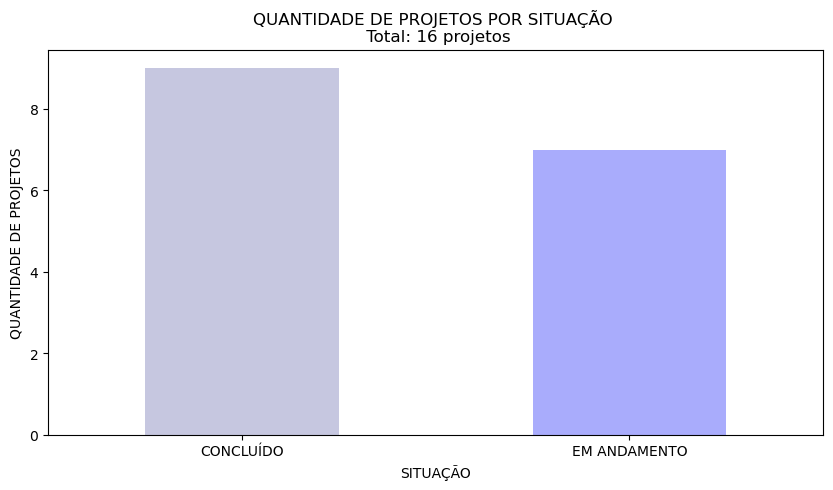

In [181]:
grafico_df_dois = df_dois.groupby('Situação')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico_df_dois.patches:
    b=p.get_bbox()
    grafico_df_dois.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('SITUAÇÃO')
plt.ylabel('QUANTIDADE DE PROJETOS')
plt.title('QUANTIDADE DE PROJETOS POR SITUAÇÃO \n Total: ' + str(df_dois['Contagem'].sum()) + ' projetos')
plt.show()

## Conclusão